# **[Alpha Vantage](https://www.alphavantage.co/documentation/) Simple Regression**
---

In [1]:
import numpy as np
import pandas as pd
# import pandas_datareader as pdr

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0,10.0)

import seaborn as sb
sb.set()

import datetime as dt

from alpha_vantage.timeseries import TimeSeries

In [2]:
stock1 = 'GOOG'
stock2 = 'AAPL'
start = dt.date.today() - dt.timedelta(365)
plot_range = 252
s = 60

### Import Data via Yahoo and pandas_datareader

In [3]:
stocks = [stock1,stock2]
stocks

['GOOG', 'AAPL']

In [4]:
# data = pdr.get_data_yahoo(stocks,start)['Close']
# data.head()

## Import Data via Alpha Vantage API and Clean

In [5]:
ts1 = TimeSeries(key = 'ALPHA_VANTAGE_API_KEY',output_format = 'pandas')
data1, meta_data1 = ts1.get_daily(symbol = stock1, outputsize = 'full')

meta_data1

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'GOOG',
 '3. Last Refreshed': '2022-03-04',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [6]:
columns = ['open','high','low',stock1,'volume']
data1.columns = columns
data1 = data1.drop(['open','high','low','volume'],1)


data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2022-03-04 to 2014-03-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


In [7]:
ts2 = TimeSeries(key = 'ALPHA_VANTAGE_API_KEY',output_format = 'pandas')
data2, meta_data2 = ts2.get_daily(symbol = stock2, outputsize = 'full')

meta_data2

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2022-03-04',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [8]:
columns2 = ['open','high','low',stock2,'volume']
data2.columns = columns2
data2 = data2.drop(['open','high','low','volume'],1)

data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5622 entries, 2022-03-04 to 1999-11-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5622 non-null   float64
dtypes: float64(1)
memory usage: 87.8 KB


In [9]:
vertical = pd.concat([data1,data2], axis = 1)
vertical 

,GOOG,AAPL
date,,
1999-11-01,NaN,77.62
1999-11-02,NaN,80.25
1999-11-03,NaN,81.50
1999-11-04,NaN,83.62
1999-11-05,NaN,88.31
...,...,...
2022-02-28,2697.82,165.12
2022-03-01,2683.36,163.20
2022-03-02,2695.03,166.56


In [10]:
returns = (np.log(vertical).diff()).dropna()
returns.tail()

,GOOG,AAPL
date,,
2022-02-28,0.002758,0.001637
2022-03-01,-0.005374,-0.011696
2022-03-02,0.004340,0.020379
2022-03-03,-0.003297,-0.001983
2022-03-04,-0.016410,-0.018580


In [11]:
sample_corr = returns.sample(s).corr()
sample_corr

,GOOG,AAPL
GOOG,1.000000,0.107762
AAPL,0.107762,1.000000


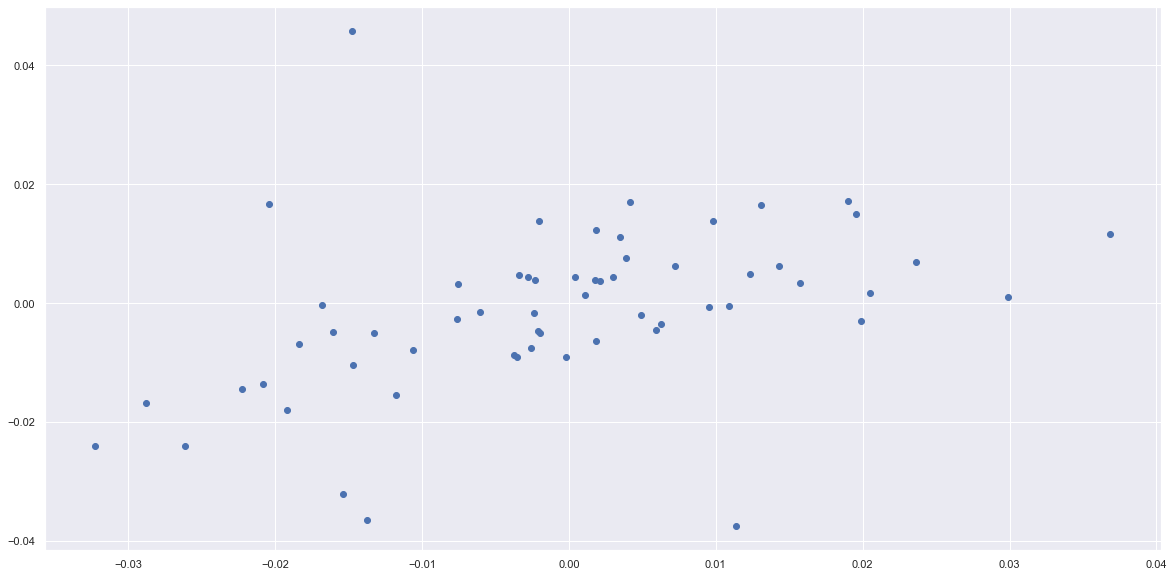

In [12]:
sample = returns.sample(s)
plt.scatter(x=sample[stock2], y=sample[stock1]);

In [13]:
reg = np.polyfit(sample[stock2], sample[stock1], deg = 1)
reg

array([ 0.40317618, -0.00094519])

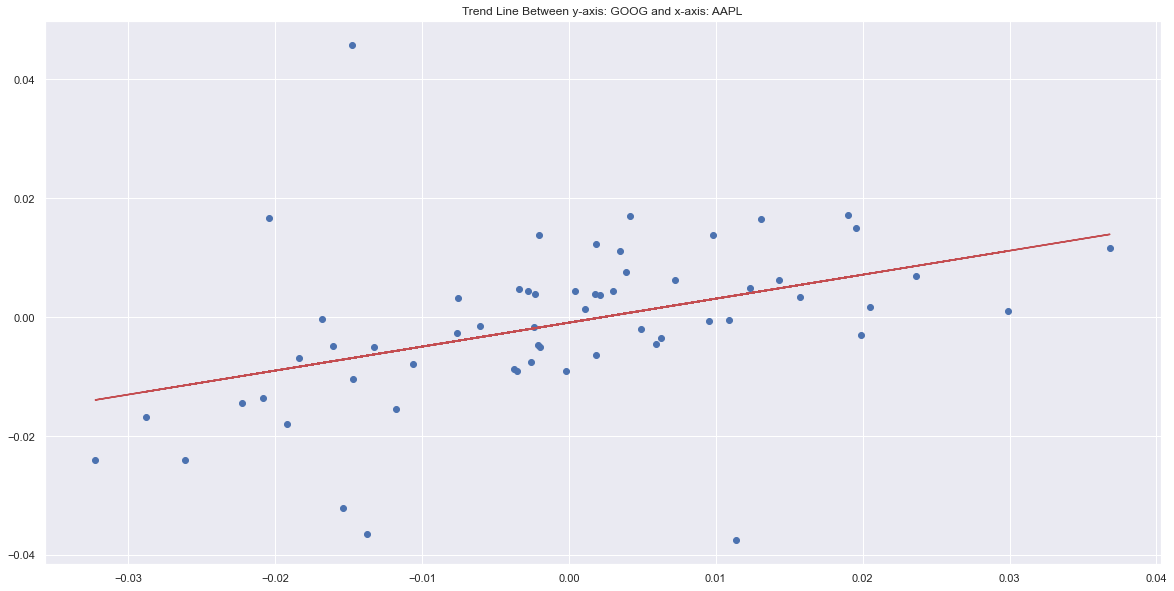

In [14]:
trend = np.polyval(reg, sample[stock2])
plt.scatter(sample[stock2],sample[stock1])
plt.plot(sample[stock2],trend, 'r')
plt.title(f'Trend Line Between y-axis: {stock1} and x-axis: {stock2}');

---
## Regression as Technical Indicator 
---

In [15]:
regStock = 'TSLA'

In [16]:
tsR = TimeSeries(key = 'ALPHA_VANTAGE_API_KEY',output_format = 'pandas')
dataR, meta_dataR = tsR.get_daily(symbol = regStock, outputsize = 'full')

meta_dataR

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2022-03-04',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [17]:
dataR.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-03-04,849.10,855.650,825.1609,838.29,22183372.0
2022-03-03,878.77,886.439,832.6001,839.29,20541169.0
2022-03-02,872.13,886.480,844.2721,879.89,24881146.0
2022-03-01,869.68,889.880,853.7800,864.37,24922287.0
2022-02-28,815.01,876.860,814.7075,870.43,33002289.0


In [18]:
columnsR = ['open','high','low','close','volume']
dataR.columns = columnsR
dataR = dataR.drop(['open','high','low','volume'],1)
# Just Take Past Years Trading Data 
dataR = dataR[:start]

dataR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2022-03-04 to 2021-03-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   254 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [19]:
time = np.arange(1, len(dataR) + 1)
dataR['time'] = time
dataR = dataR[['time', 'close']]
dataR = round(dataR, 2)
dataR.tail()

,time,close
date,,
2021-03-10,250,668.06
2021-03-09,251,673.58
2021-03-08,252,563.00
2021-03-05,253,597.95
2021-03-04,254,621.44


In [20]:
regR = np.polyfit(dataR['time'],dataR['close'], deg = 1)
regR

array([  -1.81133447, 1034.04231085])

In [21]:
slicer = -50

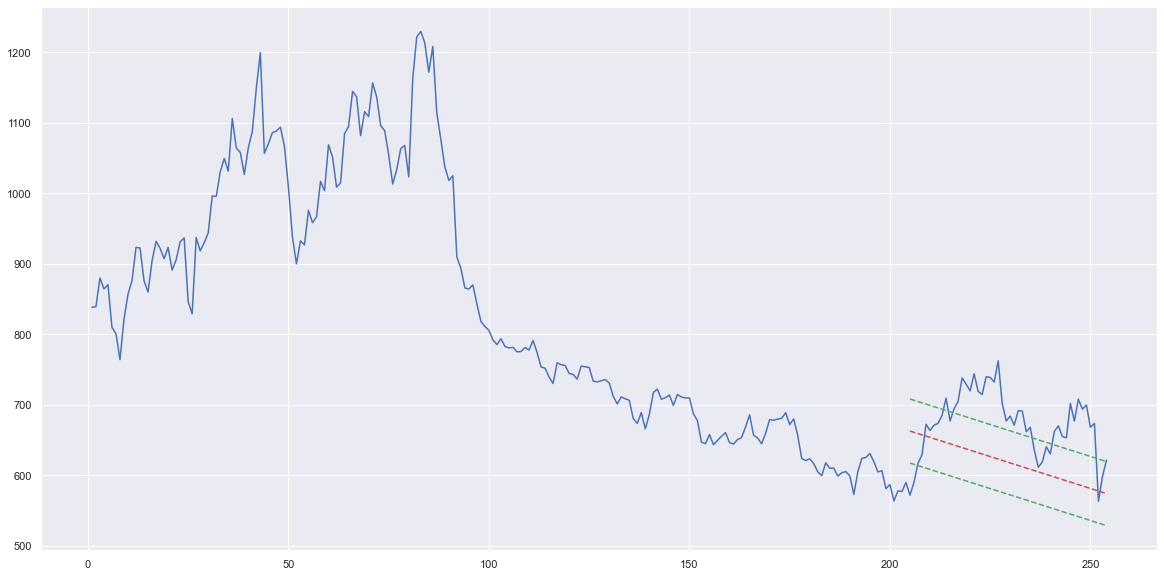

In [22]:
trendR = np.polyval(regR, dataR['time'][slicer:])
std = dataR['close'][slicer:].std()
plt.plot(dataR['time'], dataR['close'], label = "S&P 500")
plt.plot(dataR['time'][slicer:], trendR, 'r--')
plt.plot(dataR['time'][slicer:], trendR - std, 'g--')
plt.plot(dataR['time'][slicer:], trendR + std, 'g--');

In [23]:
predict = np.poly1d(regR)
predict(300)

490.6419685039373

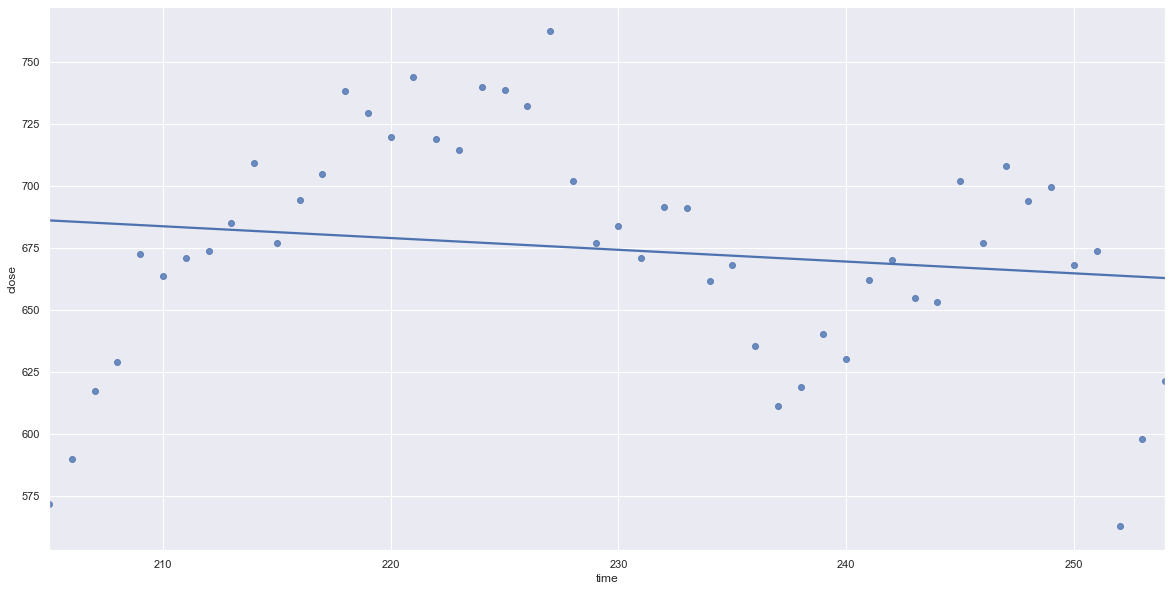

In [24]:
sb.regplot(x='time',y='close', ci=None, fit_reg=True, data=dataR[slicer:]);